In [1]:
import pandas as pd

In [95]:

dataset= pd.read_csv("C:/Users/Diptesh Mukherjee/Downloads/news_data.csv")

dataset

,docno,doclen,text
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...
1,LA062989-0001,44,express conflict ideolog even contain symbol s...
2,LA062989-0002,51,how inan reason five suprem court justic rule ...
3,LA062989-0003,31,former california chief justic rose bird use m...
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...
...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...
20568,FT922-1327,254,compani are encourag employe travel road rail ...
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...


In [4]:
dataset

,docno,doclen,text
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...
1,LA062989-0001,44,express conflict ideolog even contain symbol s...
2,LA062989-0002,51,how inan reason five suprem court justic rule ...
3,LA062989-0003,31,former california chief justic rose bird use m...
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...
...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...
20568,FT922-1327,254,compani are encourag employe travel road rail ...
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Diptesh
[nltk_data]     Mukherjee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:

count=0
sid = SentimentIntensityAnalyzer()
neg_results=[]
pos_results=[]
neu_results=[]
compunds=[]




for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     ss = sid.polarity_scores(dataset.iloc[i]["text"])
     neg_results.append(ss["neg"])
     pos_results.append(ss["pos"])
     neu_results.append(ss["neu"])
     compunds.append(ss["compound"])

dataset["neg"]=neg_results
dataset["pos"]=pos_results


dataset["neu"]=neu_results


dataset["compund"]=compunds


        



    
    

    

In [8]:
dataset["neg"].mean()

0.0701877795061244

In [9]:
dataset["pos"].mean()

0.09528456153995722

In [10]:
dataset["neu"].mean()

0.8345263464903776

In [11]:
dataset["compund"].mean()

0.2986887905891524

In [15]:
#notneeded
count=0
my_dict = {}
final_results=[]
for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     if(dataset.iloc[i]["pos"]-dataset.iloc[i]["neg"]>=0.03):
        final_results.append("neg")
       dataset.iloc[i]["final_result"]="pos"
     if(dataset.iloc[i]["neg"]-dataset.iloc[i]["pos"]>=0.03):
      dataset.iloc[i]["final_result"]="pos"
     else:
      dataset.iloc[i]["final_result"]="neu"

<AxesSubplot:>

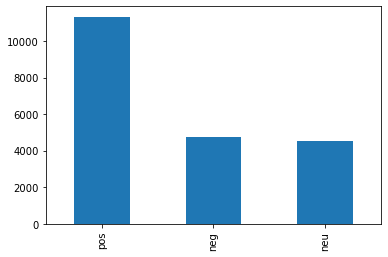

In [113]:
#plotting the percentage of positive, negative and neutral documents
count=0
final_results=[]
for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
      if(dataset.iloc[i]["compund"]>=0.5):
        final_results.append("pos")
      elif(dataset.iloc[i]["compund"]<=-0.5):
        final_results.append("neg") 
      else:
        final_results.append("neu")  
dataset["final_results"]=final_results    
dataset["final_results"].value_counts().plot(kind='bar')

In [104]:
#Getting the words from each category of docs

my_dict = {}
#sid = SentimentIntensityAnalyzer()
pos_word_list=[]
pos_word_list_docid=[]

neu_word_list=[]
neu_word_list_docid=[]
neg_word_list=[]
neg_word_list_docid=[]

count=0
final_results=[]
for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     if(dataset.iloc[i]["compund"]>=0.5):
         pos_word_list.append(dataset.iloc[i]["text"])
         pos_word_list_docid.append(dataset.iloc[i]["docno"])
     elif(dataset.iloc[i]["compund"]<=-0.5):
         neg_word_list.append(dataset.iloc[i]["text"])
         neg_word_list_docid.append(dataset.iloc[i]["docno"])   
     else:
         neu_word_list.append(dataset.iloc[i]["text"])  
         neu_word_list_docid.append(dataset.iloc[i]["docno"])   


In [126]:
#Getting the words from positive category of docs and getting the words of most occurance
pos_word = pd.DataFrame({'pos_word_list_docid':pos_word_list_docid, 'pos_word_list':pos_word_list})
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100, strip_accents='unicode', analyzer='word',  lowercase=True, use_idf=False)
tfidf.fit_transform(pos_word['pos_word_list'])
Y=tfidf.get_feature_names_out(X)
Y

array(['also', 'back', 'bank', 'busi', 'but', 'call', 'cent', 'chang',
       'citi', 'come', 'compani', 'could', 'countri', 'day', 'develop',
       'dollar', 'end', 'even', 'expect', 'first', 'fund', 'game',
       'gener', 'get', 'go', 'good', 'govern', 'group', 'he', 'high',
       'home', 'hous', 'howev', 'in', 'includ', 'increas', 'industri',
       'interest', 'invest', 'issu', 'it', 'last', 'like', 'look', 'made',
       'make', 'manag', 'mani', 'market', 'may', 'month', 'mr', 'much',
       'nation', 'need', 'new', 'next', 'offer', 'one', 'peopl', 'per',
       'plan', 'play', 'point', 'pound', 'price', 'product', 'profit',
       'public', 'rate', 'report', 'said', 'sale', 'say', 'servic',
       'share', 'show', 'sinc', 'state', 'still', 'take', 'the', 'there',
       'thi', 'three', 'time', 'trade', 'two', 'uk', 'us', 'use', 'want',
       'way', 'we', 'week', 'well', 'work', 'world', 'would', 'year'],
      dtype=object)

In [110]:
#Getting the words from negative category of docs and getting the words of most occurance
neg_word = pd.DataFrame({'x':neg_word_list_docid, 'y':neg_word_list})
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100, strip_accents='unicode', analyzer='word',  lowercase=True, use_idf=False)
X = tfidf.fit_transform(df2['y'])
tfidf.get_feature_names_out()

array(['also', 'angel', 'area', 'back', 'bank', 'but', 'call', 'case',
       'cent', 'charg', 'citi', 'close', 'come', 'compani', 'could',
       'counti', 'countri', 'cut', 'day', 'depart', 'dollar', 'end',
       'even', 'fire', 'first', 'forc', 'gener', 'get', 'go', 'govern',
       'group', 'he', 'home', 'hous', 'howev', 'in', 'includ', 'industri',
       'issu', 'it', 'kill', 'last', 'like', 'lo', 'loss', 'made', 'make',
       'mani', 'market', 'may', 'member', 'month', 'mr', 'much', 'nation',
       'new', 'offic', 'offici', 'one', 'peopl', 'per', 'plan', 'point',
       'polic', 'polit', 'pound', 'presid', 'price', 'problem', 'public',
       'report', 'right', 'said', 'san', 'say', 'servic', 'sinc', 'state',
       'still', 'take', 'the', 'there', 'they', 'thi', 'three', 'time',
       'two', 'unit', 'us', 'use', 'want', 'war', 'way', 'we', 'week',
       'work', 'world', 'would', 'year', 'yesterday'], dtype=object)

In [112]:
#Getting the words from neutral category of docs and getting the words of most occurance
neu_word = pd.DataFrame({'neu_word_list_docid':neu_word_list_docid, 'neu_word_list':neu_word_list})
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100, strip_accents='unicode', analyzer='word',  lowercase=True, use_idf=False)
X = tfidf.fit_transform(neu_word['neu_word_list'])
tfidf.get_feature_names_out()

array(['10', 'also', 'back', 'bank', 'build', 'busi', 'but', 'call',
       'cent', 'citi', 'close', 'compani', 'continu', 'could', 'countri',
       'day', 'develop', 'director', 'dollar', 'econom', 'end', 'even',
       'expect', 'financi', 'first', 'fund', 'gener', 'go', 'govern',
       'group', 'he', 'hous', 'howev', 'in', 'includ', 'increas',
       'industri', 'intern', 'invest', 'issu', 'it', 'last', 'lead',
       'like', 'london', 'loss', 'made', 'make', 'manag', 'mani',
       'market', 'may', 'meet', 'member', 'minist', 'month', 'mr',
       'nation', 'new', 'next', 'offic', 'offici', 'one', 'oper', 'parti',
       'peopl', 'per', 'plan', 'point', 'pound', 'presid', 'price',
       'product', 'public', 'rate', 'report', 'said', 'sale', 'say',
       'servic', 'share', 'sinc', 'state', 'take', 'the', 'thi', 'three',
       'time', 'trade', 'two', 'uk', 'union', 'us', 'use', 'week', 'work',
       'world', 'would', 'year', 'yesterday'], dtype=object)

array([[<AxesSubplot:title={'center':'neu'}>]], dtype=object)

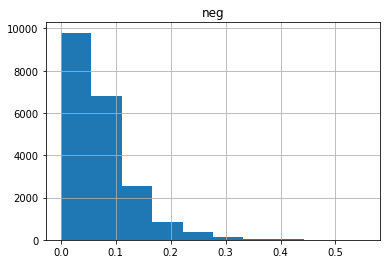

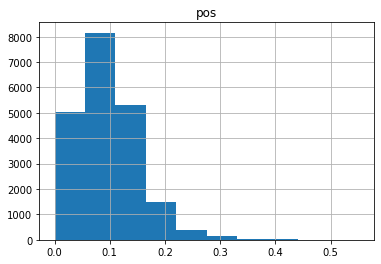

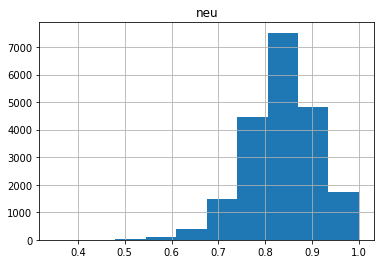

In [75]:
dataset.hist(column="neg")
dataset.hist(column="pos")
dataset.hist(column="neu")



In [ ]:
#Random Stuffs
from k_means_constrained import KMeansConstrained
 import numpy as np
 X = np.array([[1, 2], [1, 4], [1, 0],
...                [4, 2], [4, 4], [4, 0]])
>>> clf = KMeansConstrained(
...     n_clusters=2,
...     size_min=2,
...     size_max=5,
...     random_state=0
... )
>>> clf.fit_predict(X)
array([0, 0, 0, 1, 1, 1], dtype=int32)
>>> clf.cluster_centers_
array([[ 1.,  2.],
       [ 4.,  2.]])
>>> clf.labels_
array([0, 0, 0, 1, 1, 1], dtype=int32)